Analyzing Restaurant Rating

Objective

The objective of analyzing this restaurant dataset is to gain insights into the characteristics and distribution of restaurants in Ciudad Victoria, Tamaulipas, Mexico. Specifically, the goals include:

1. Location Analysis:
   - Identify the geographical distribution of restaurants using latitude and longitude.
   - Determine clusters of open and closed restaurants.

2. Pricing Insights:
   - Analyze the distribution of restaurants by price categories (Low, Medium, High).
   - Explore how pricing correlates with other features such as `Parking`, `Smoking_Allowed`, and `Alcohol_Service`.

3. Service and Amenities:
   - Investigate how many restaurants allow smoking or serve alcohol.
   - Examine the availability of parking and its relation to restaurant operations.

4. Operational Insights:
   - Analyze the status of restaurants (`Open` vs. `Closed`) and any patterns linked to location, pricing, or amenities.
   - Explore the role of franchises in restaurant success (if applicable).

5. Customer Segmentation:
   - Understand restaurant offerings (e.g., price and amenities) to infer target demographics.

6. Data Visualization:
   - Use scatter plots, area charts, and other visualizations to highlight patterns and trends in the data.

This analysis can provide actionable insights for stakeholders such as restaurant owners, city planners, and marketing professionals looking to enhance restaurant operations or open new establishments.

DATA READING

In [46]:
import pandas as pd
file="C:/Users/umaim/Downloads/Restaurant_Ratings/restaurants.csv"
data=pd.read_csv(file) 
# print(data)
print("Reading a file")
print(data.info())

Reading a file
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant_ID    130 non-null    int64  
 1   Name             130 non-null    object 
 2   City             130 non-null    object 
 3   State            130 non-null    object 
 4   Country          130 non-null    object 
 5   Zip_Code         56 non-null     float64
 6   Latitude         130 non-null    float64
 7   Longitude        130 non-null    float64
 8   Alcohol_Service  43 non-null     object 
 9   Smoking_Allowed  130 non-null    object 
 10  Price            130 non-null    object 
 11  Franchise        130 non-null    object 
 12  Area             130 non-null    object 
 13  Parking          65 non-null     object 
dtypes: float64(3), int64(1), object(10)
memory usage: 14.3+ KB
None


In [127]:
print("Describe a File")
print(data.describe(include=object).T)

Describe a File
                count unique              top freq
Name              130    127             Vips    3
City              130      4  San Luis Potosi   84
State             130      3  San Luis Potosi   84
Country           130      1           Mexico  130
Alcohol_Service    43      2      Wine & Beer   34
Smoking_Allowed   130      4               No   95
Price             130      3           Medium   60
Franchise         130      2               No  108
Area              130      2           Closed  115
Parking            65      3              Yes   46


In [129]:
print("Shape")
print(data.shape)

Shape
(130, 14)


DATA CLEANING

In [131]:
print("Null Values in each column:")
print(data.isnull().sum())

Null Values in each column:
Restaurant_ID       0
Name                0
City                0
State               0
Country             0
Zip_Code           74
Latitude            0
Longitude           0
Alcohol_Service    87
Smoking_Allowed     0
Price               0
Franchise           0
Area                0
Parking            65
dtype: int64


In [133]:
print("Access File:",data.info())

print(data.loc[2:10,['Restaurant_ID','City']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant_ID    130 non-null    int64  
 1   Name             130 non-null    object 
 2   City             130 non-null    object 
 3   State            130 non-null    object 
 4   Country          130 non-null    object 
 5   Zip_Code         56 non-null     float64
 6   Latitude         130 non-null    float64
 7   Longitude        130 non-null    float64
 8   Alcohol_Service  43 non-null     object 
 9   Smoking_Allowed  130 non-null    object 
 10  Price            130 non-null    object 
 11  Franchise        130 non-null    object 
 12  Area             130 non-null    object 
 13  Parking          65 non-null     object 
dtypes: float64(3), int64(1), object(10)
memory usage: 14.3+ KB
Access File: None
    Restaurant_ID             City
2          132564  Ciudad Victoria
3      

In [135]:
print(data.iloc[2:10,[1,4]])

                                 Name Country
2                            Church's  Mexico
3                        Cafe Chaires  Mexico
4                    McDonalds Centro  Mexico
5                  Gorditas Doña Tota  Mexico
6  Tacos De Barbacoa Enfrente Del Tec  Mexico
7              Hamburguesas La Perica  Mexico
8            Pollo Frito Buenos Aires  Mexico
9                       Carnitas Mata  Mexico


In [137]:

# Fill null values in the 'Close' column with the column's mean and assign it back
data['Zip_Code'] = data['Zip_Code'].fillna(data['Zip_Code'].mean())

# Or fill all columns with a default value (like 0)
# data.fillna(0, inplace=True)

# You can also use forward fill (using the previous row's value)
# data.fillna(method='ffill', inplace=True)

# Or backward fill (using the next row's value)
# data.fillna(method='bfill', inplace=True)

print("\nAfter filling null values:")
print(data.isnull().sum()) 


After filling null values:
Restaurant_ID       0
Name                0
City                0
State               0
Country             0
Zip_Code            0
Latitude            0
Longitude           0
Alcohol_Service    87
Smoking_Allowed     0
Price               0
Franchise           0
Area                0
Parking            65
dtype: int64


In [139]:
files="C:/Users/umaim/Downloads/Restaurant_Ratings/ratings.csv"
datas=pd.read_csv(files)
print(datas.columns)
print(datas['Food_Rating'].min())
print(datas['Food_Rating'].max())
print(datas['Food_Rating'].mode())
print(datas['Food_Rating'].mean())
print(datas['Food_Rating'].std())
print(datas.nlargest(3,'Food_Rating').head(5))
print(datas.nsmallest(3,'Food_Rating'))

Index(['Consumer_ID', 'Restaurant_ID', 'Overall_Rating', 'Food_Rating',
       'Service_Rating'],
      dtype='object')
0
2
0    2
Name: Food_Rating, dtype: int64
1.215331610680448
0.7922942990574058
  Consumer_ID  Restaurant_ID  Overall_Rating  Food_Rating  Service_Rating
0       U1077         135085               2            2               2
1       U1077         135038               2            2               1
2       U1077         132825               2            2               2
   Consumer_ID  Restaurant_ID  Overall_Rating  Food_Rating  Service_Rating
5        U1068         132740               0            0               0
7        U1068         132732               0            0               0
12       U1067         132630               1            0               1


In [141]:
print("\nChecking for duplicate rows:")
print(data.duplicated())  # This will show the number of duplicate rows

print(data.duplicated().sum())  # This will show the number of duplicate rows


Checking for duplicate rows:
0      False
1      False
2      False
3      False
4      False
       ...  
125    False
126    False
127    False
128    False
129    False
Length: 130, dtype: bool
0


In [143]:
data.drop_duplicates(inplace=True)

print("\nAfter dropping duplicates:")
print(data.shape)  # Check the shape after removing duplicates


After dropping duplicates:
(130, 14)


In [144]:
print("Remove Null Values")
data.dropna(axis=0,inplace=True)
print(data.info())

Remove Null Values
<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 21 to 126
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant_ID    28 non-null     int64  
 1   Name             28 non-null     object 
 2   City             28 non-null     object 
 3   State            28 non-null     object 
 4   Country          28 non-null     object 
 5   Zip_Code         28 non-null     float64
 6   Latitude         28 non-null     float64
 7   Longitude        28 non-null     float64
 8   Alcohol_Service  28 non-null     object 
 9   Smoking_Allowed  28 non-null     object 
 10  Price            28 non-null     object 
 11  Franchise        28 non-null     object 
 12  Area             28 non-null     object 
 13  Parking          28 non-null     object 
dtypes: float64(3), int64(1), object(10)
memory usage: 3.3+ KB
None


In [145]:
print("First five rows")
print(data.head(5))

First five rows
    Restaurant_ID                          Name             City  \
21         132723             Gordas De Morales  San Luis Potosi   
27         132766                        Mikasa       Cuernavaca   
28         132767  Restaurant Familiar El Chino         Jiutepec   
38         132854                       Sirlone  San Luis Potosi   
42         132862          La Posada Del Virrey  San Luis Potosi   

              State Country      Zip_Code   Latitude   Longitude  \
21  San Luis Potosi  Mexico  75790.714286  22.148934 -101.019845   
27          Morelos  Mexico  75790.714286  18.910178  -99.231544   
28          Morelos  Mexico  75790.714286  18.882087  -99.163027   
38  San Luis Potosi  Mexico  75790.714286  22.137863 -100.938327   
42  San Luis Potosi  Mexico  75790.714286  22.150643 -100.987015   

   Alcohol_Service  Smoking_Allowed   Price Franchise    Area Parking  
21        Full Bar  Smoking Section  Medium        No  Closed  Public  
27     Wine & Beer    

In [147]:
print("Last five rows")
last_five_rows = data.tail(5)
print(last_five_rows)

Last five rows
     Restaurant_ID                               Name             City  \
113         135071             Restaurante La Cantina  San Luis Potosi   
115         135073       Restaurante Bar El Gallinero  San Luis Potosi   
116         135074  Restaurante La Parroquia Potosina  San Luis Potosi   
118         135076          Restaurante Pueblo Bonito  San Luis Potosi   
126         135104                               Vips  Ciudad Victoria   

               State Country      Zip_Code   Latitude   Longitude  \
113  San Luis Potosi  Mexico  78396.000000  22.126375 -100.910926   
115  San Luis Potosi  Mexico  78000.000000  22.147175 -100.974269   
116  San Luis Potosi  Mexico  78000.000000  22.149689 -100.999525   
118  San Luis Potosi  Mexico  78395.000000  22.181017 -100.973614   
126       Tamaulipas  Mexico  75790.714286  23.752982  -99.168434   

    Alcohol_Service  Smoking_Allowed   Price Franchise    Area Parking  
113        Full Bar  Smoking Section  Medium        

DATA VISUALIZATION

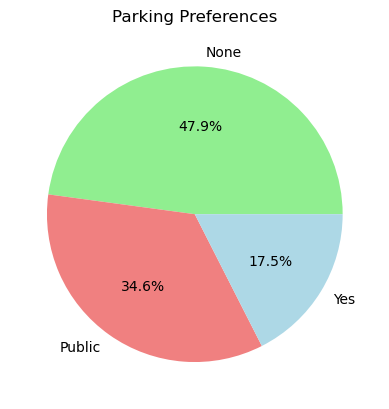

In [25]:
# Pie Chart

parking = ["None", "Public", "Yes"]
colors = ['lightgreen', 'lightcoral', 'lightblue']

plt.pie([123, 89,45 ],  # Example data percentages
        labels=parking, 
        colors=colors, 
        autopct='%1.1f%%')

plt.title("Parking Preferences")
plt.show()


<class 'pandas.core.frame.DataFrame'>


<Figure size 1000x600 with 0 Axes>

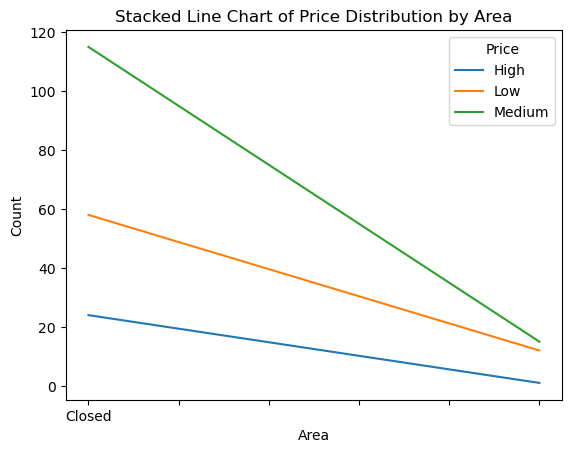

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
file = "C:/Users/umaim/Downloads/Restaurant_Ratings/restaurants.csv"
data = pd.read_csv(file)

# Check if the data is a DataFrame
print(type(data))  # Should print: <class 'pandas.core.frame.DataFrame'>

# Group the data by 'Area' and 'Price', and count occurrences
line_data = data.groupby(['Area', 'Price']).size().unstack(fill_value=0)

# Plot a stacked line chart
plt.figure(figsize=(10, 6))
line_data.plot(kind='line', stacked=True)

# Add title and labels
plt.title('Stacked Line Chart of Price Distribution by Area')
plt.xlabel('Area')
plt.ylabel('Count')

# Show the plot
plt.show()


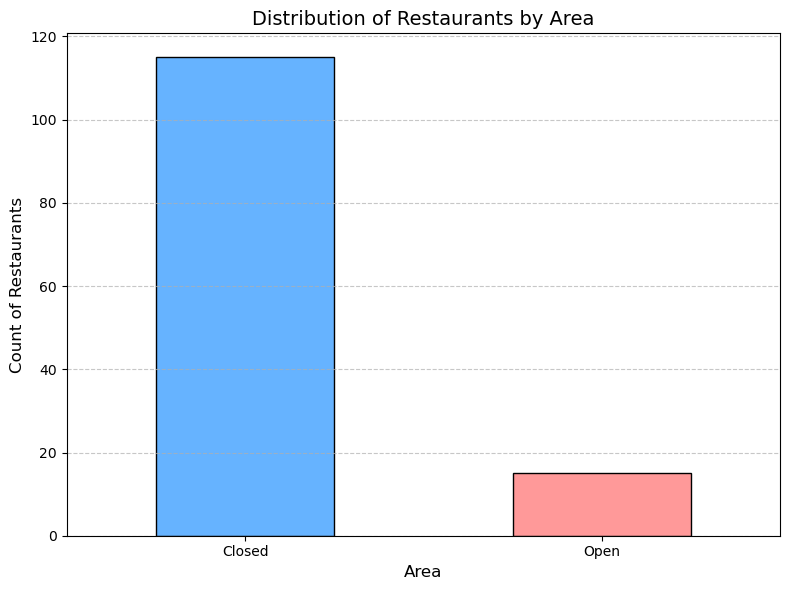

In [53]:
# Count the number of restaurants by 'Area'
area_counts = data['Area'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
area_counts.plot(kind='bar', color=['#66b3ff', '#ff9999'], edgecolor='black')

# Customize the chart
plt.title('Distribution of Restaurants by Area', fontsize=14)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Count of Restaurants', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()


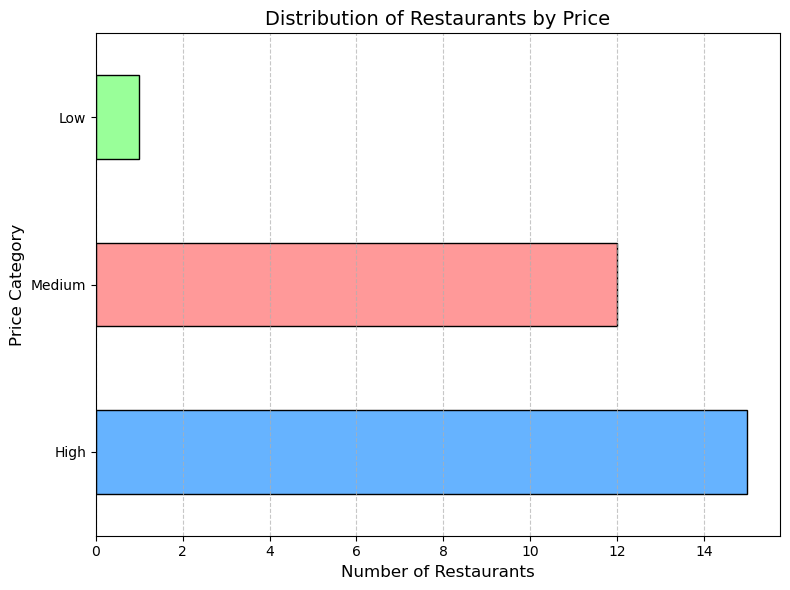

In [155]:
# Count the number of restaurants by 'Price'
price_counts = data['Price'].value_counts()

# Plot a horizontal bar chart
plt.figure(figsize=(8, 6))
price_counts.plot(kind='barh', color=['#66b3ff', '#ff9999', '#99ff99'], edgecolor='black')

# Customize the chart
plt.title('Distribution of Restaurants by Price', fontsize=14)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Price Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()


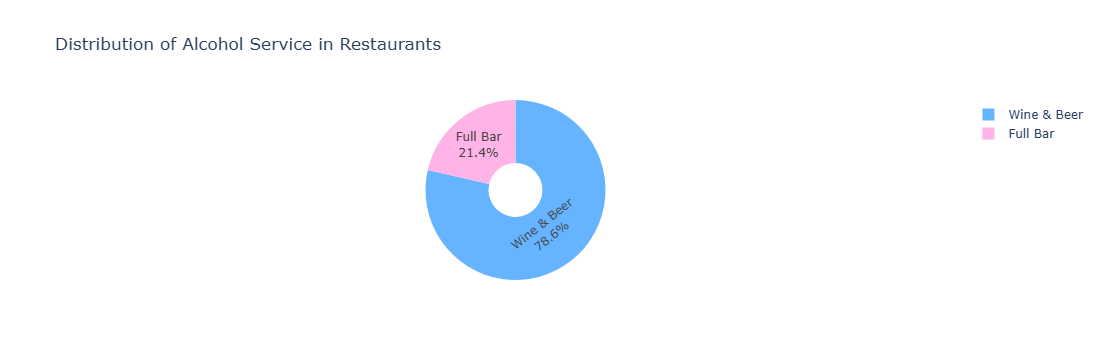

In [158]:
# Create a donut chart for the distribution of Alcohol_Service
alcohol_service_count = data['Alcohol_Service'].value_counts()

# Create the donut chart
fig = go.Figure(go.Pie(
    labels=alcohol_service_count.index,  # Labels are the unique values of Alcohol_Service
    values=alcohol_service_count.values,  # Values are the count of each unique value
    hole=0.3,  # This makes the pie chart a donut (hole size)
    textinfo='percent+label',  # Show percentage and label
    marker=dict(colors=['#66b3ff', '#ffb3e6', '#ff6666', '#ffcc99']),  # Customize colors
))

# Update the layout with a title
fig.update_layout(
    title="Distribution of Alcohol Service in Restaurants",
    showlegend=True  # Show legend
)

# Show the chart
fig.show()


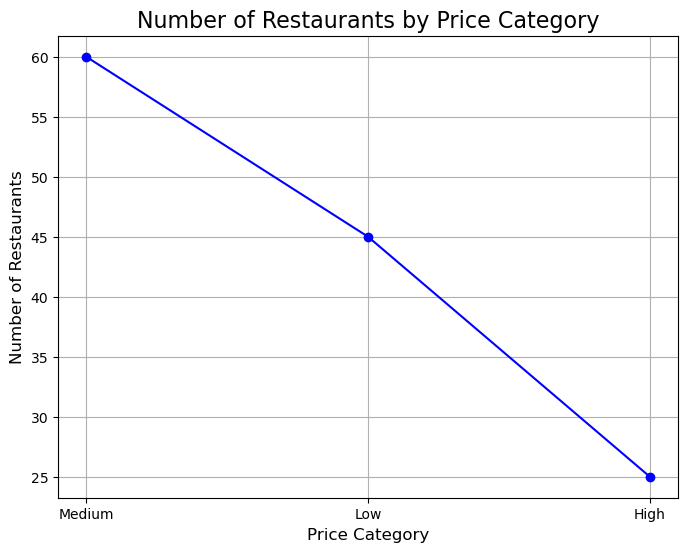

In [176]:
# Count the number of restaurants for each price category
price_counts = data['Price'].value_counts()

# Create the line chart
plt.figure(figsize=(8, 6))
plt.plot(price_counts.index, price_counts.values, marker='o', linestyle='-', color='blue')

# Add titles and labels
plt.title('Number of Restaurants by Price Category', fontsize=16)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.grid(True)

# Show the chart
plt.show()


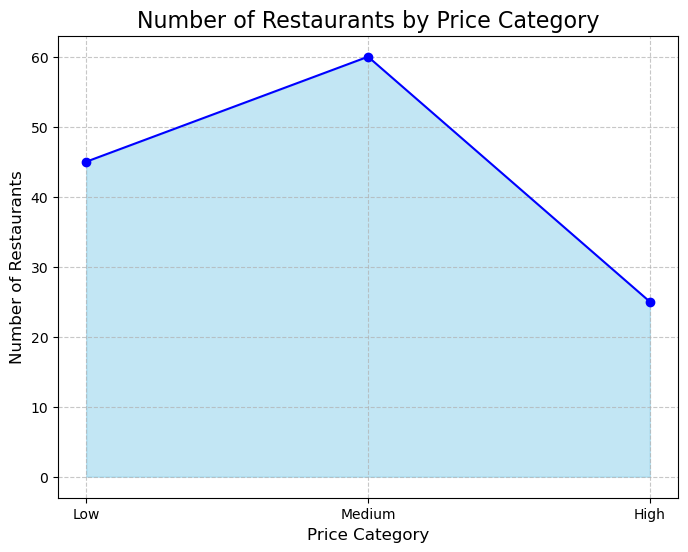

In [180]:
# Count the number of restaurants for each price category
price_counts = data['Price'].value_counts()

# Sort categories if needed
price_counts = price_counts.reindex(['Low', 'Medium', 'High'], fill_value=0)

# Create the area chart
plt.figure(figsize=(8, 6))
plt.fill_between(price_counts.index, price_counts.values, color='skyblue', alpha=0.5)
plt.plot(price_counts.index, price_counts.values, marker='o', color='blue')

# Add titles and labels
plt.title('Number of Restaurants by Price Category', fontsize=16)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the chart
plt.show()


In [ ]:
Conclusion:

The Restaurant Rating Dashboard provides valuable insights into customer preferences, restaurant performance, and areas for improvement. Key findings include
:
1.	Top Performers: Restaurants like Tortas Locas Hipoca and Gorditas Doña Gloria consistently deliver high-quality food and service, resulting in strong overall ratings and customer loyalt
	y2
2.	Focus Areas: Restaurants with lower ratings in service or food, such as Vips, need immediate attention to improve customer satisfaction and competitivene
	s3.
3.	Parking's Impact: The availability of private parking significantly influences customer choices, highlighting the importance of convenience in dining decisi
	o4s.
4.	Balanced Performance: The strongest performers excel in both food and service quality, emphasizing the need for a well-rounded approach to meeting customer expectat
i5ns.
5.	Actionable Insights: Underperforming restaurants can benefit from enhancing their food quality, providing better service, and addressing operational gaps to attract and retain more cust
	omers.
Final :Thought
By leveraging these insights, restaurants can build strategies to enhance customer experiences, drive higher ratings, and achieve long-term growth in a competitive market.
